## Manipulating Images 

In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


Importing Images

In [1]:
#image 1 = lenna.png
import requests 
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png"
response = requests.get(url)
with open("lenna.png", "wb") as file:
    file.write(response.content)

In [2]:
#image 1 = cat.png
import requests 
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cat.png"
response = requests.get(url)
with open("cat.png", "wb") as file:
    file.write(response.content)

Importing required functions for the lab

In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

### Copying image

Reassigning the array to another variable to make sure we change and perform manipulations on copy-not the original image itself

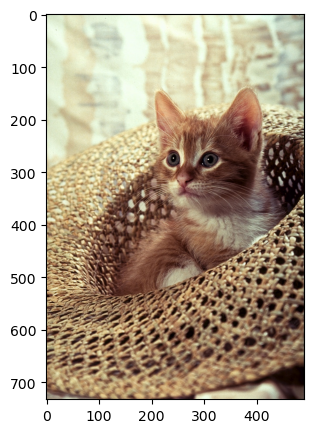

In [3]:
cat = cv2.imread("cat.png")
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
A = cat

we use the id function to find the object's memory address; we see it is the same as the original array.

In [7]:
id(A)==id(cat)
id(A)

1781071787472

If we apply the method `copy(), the memory address is different- and that's what we want

In [8]:
B = cat.copy()
id(B)==id(cat)

False

When we do not apply the method copy(), the variable will point to the same location in memory. 
Consider the array baboon, if we set all its values to zero, then all the values in A will be zero.
This is because baboon and A point to the same place in memory, but B will not be affected.

In [9]:
cat[:,:,] = 0

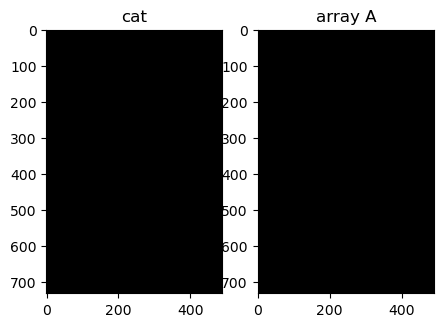

In [10]:
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))
plt.title("cat")
plt.subplot(122)
plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
plt.title("array A")
plt.show()

We see they are the same, this is called aliasing. Aliasing happens whenever one variable's value is assigned to another variable because variables are just names that store references to values. We can also compare baboon and array B:

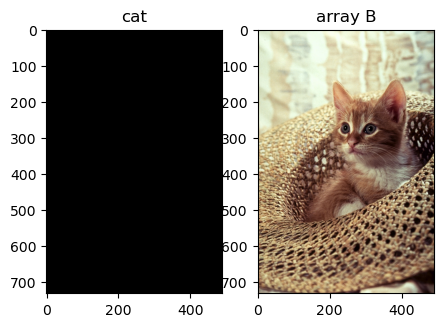

In [12]:
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))
plt.title("cat")
plt.subplot(122)
plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
plt.title("array B")
plt.show()

They are different because they used the method copy.

### Fliping Images

Flipping images involves reordering the index of the pixels such that it changes the orientation of the image. Consider the following image:


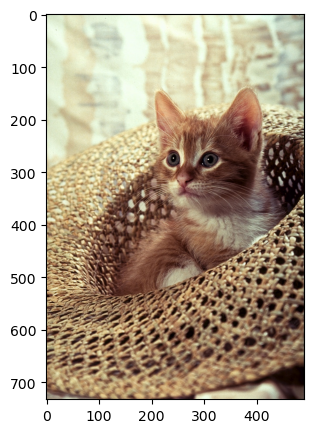

In [14]:
image = cv2.imread("cat.png")
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

We can cast it to an array and find the shape:

In [15]:
width, height,C=image.shape
print('width, height,C',width, height,C)

width, height,C 733 490 3


Let's Flip i.e rotate it vertically. First, we create an array of equal size of type np.uint8 bit image.

In [16]:
array_flip = np.zeros((width, height,C),dtype=np.uint8)

We assign the first row of pixels of the original array to the new array's last row. We repeat the process for every row, incrementing the row number for the original array and decreasing the new array's row index assigning the pixels accordingly.

In [17]:
for i,row in enumerate(image):
        array_flip[width-1-i,:,:]=row

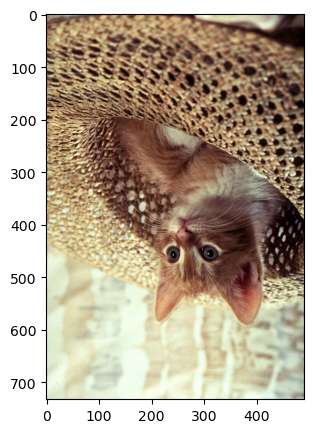

In [18]:
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(array_flip, cv2.COLOR_BGR2RGB))
plt.show()

<code>OpenCV</code>has several ways to flip an image, we can use  the <code>flip()</code> function; we have the input image array. The parameter is the <code>flipCode</code>

is the value indicating what kind of flip we would like to perform; 
<li><code>flipcode</code> = 0: flip vertically around the x-axis</li>
<li><code>flipcode</code> > 0: flip horizontally around y-axis positive value</li>
<li><code>flipcode</code>&#60 0: flip vertically and horizontally, flipping around both axes negative value</li>
Let apply different <code>flipcode</code>'s in a loop:

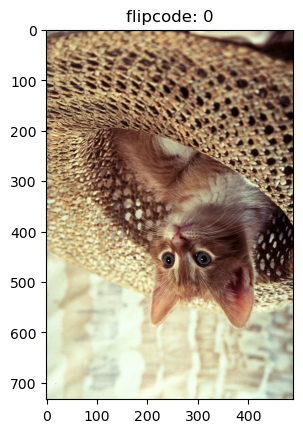

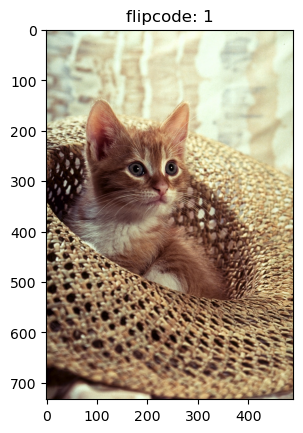

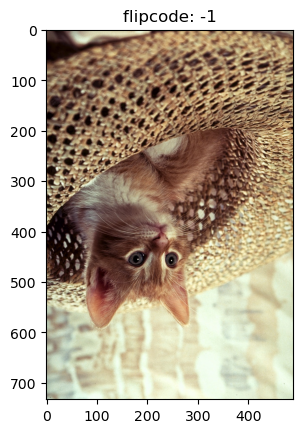

In [19]:
for flipcode in [0,1,-1]:
    im_flip =  cv2.flip(image,flipcode )
    plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
    plt.title("flipcode: "+str(flipcode))
    plt.show()

We can also use the <code>rotate()</code> function. The parameter is an integer indicating what kind of flip we would like to perform. 


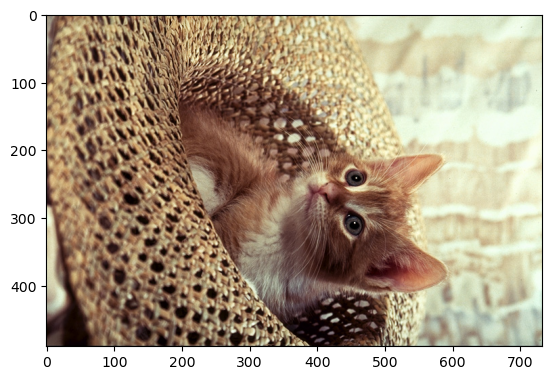

In [20]:
im_flip = cv2.rotate(image,0)
plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
plt.show()

OpenCV module has built-in attributes the describe the type of flip, the values are just integers. Several are shown in the following <code>dict</code>:


In [21]:
flip = {"ROTATE_90_CLOCKWISE":cv2.ROTATE_90_CLOCKWISE,"ROTATE_90_COUNTERCLOCKWISE":cv2.ROTATE_90_COUNTERCLOCKWISE,"ROTATE_180":cv2.ROTATE_180}

We see the keys are just an integer


In [22]:
flip["ROTATE_90_CLOCKWISE"]

0

We can plot each of the outputs using the different  parameter values 


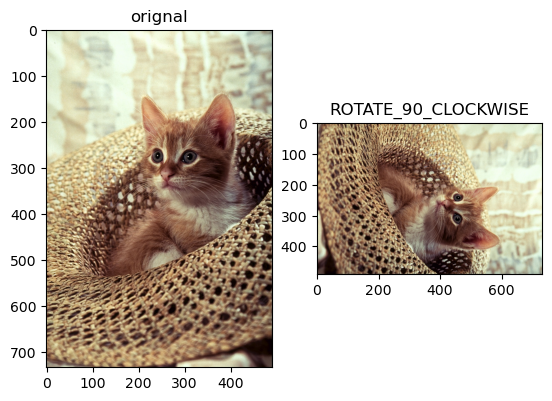

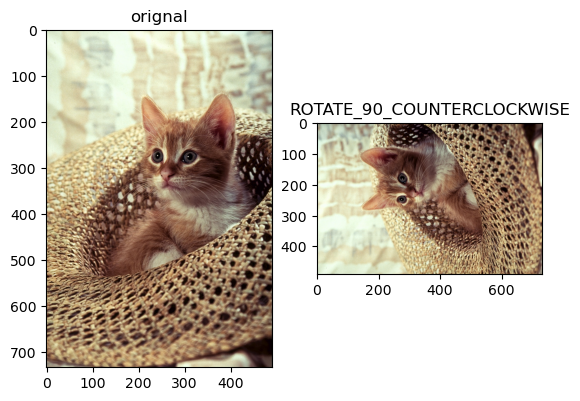

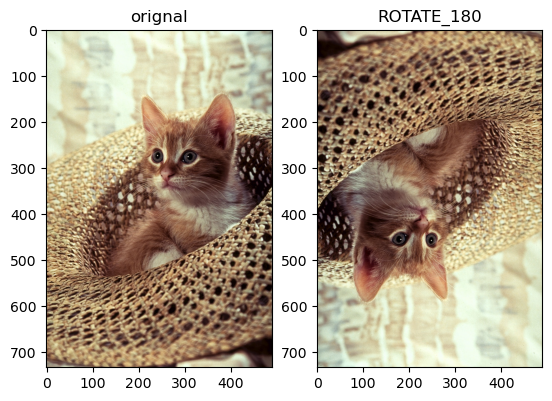

In [24]:
for key, value in flip.items():
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(cv2.rotate(image,value), cv2.COLOR_BGR2RGB))
    plt.title(key)
    plt.show()

### Cropping an Image

Cropping is "cutting out" the part of the image and throwing out the rest; we can crop using arrays. Let start with a vertical crop; the variable <code>upper</code> is the first row that we would like to include in the image, the variable <code>lower</code> is the last row we would like to include. We then use slicing to obtain the new image. 


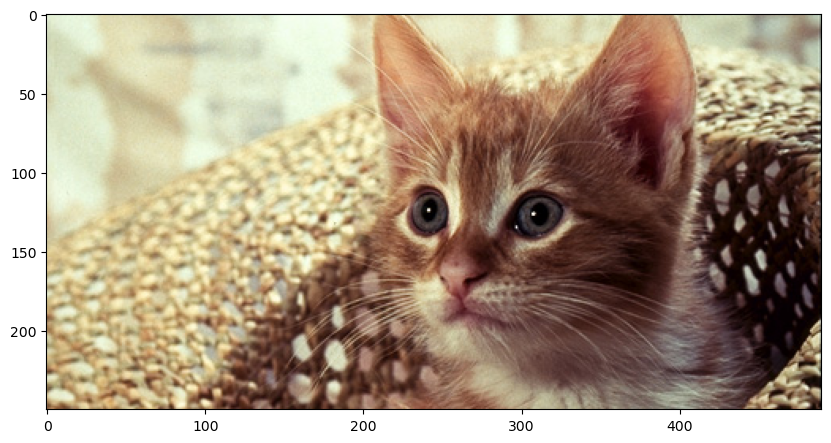

In [25]:
upper = 150
lower = 400
crop_top = image[upper: lower,:,:]
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(crop_top, cv2.COLOR_BGR2RGB))
plt.show()

consider the array <code>crop_top</code> we  can also crop horizontally  the variable right is the first column that we would like to include in the image, the variable left is the last column we would like to include in the image.


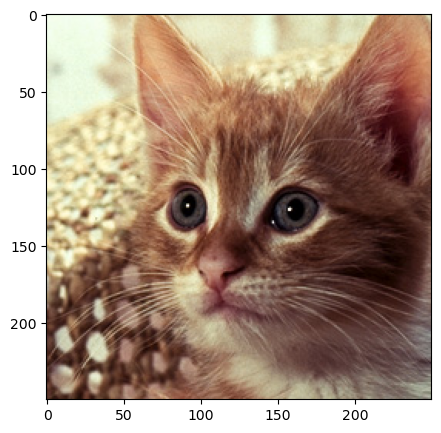

In [27]:
left = 150
right = 400
crop_horizontal = crop_top[: ,left:right,:]
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(crop_horizontal, cv2.COLOR_BGR2RGB))
plt.show()

### Changing Specific Image Pixels

We can change specific image pixels using  array indexing; for example, we can set  all the channels in the original image we cropped to zero :


In [28]:
array_sq = np.copy(image)
array_sq[upper:lower,left:right,:] = 0

We can compare the results to the new image.

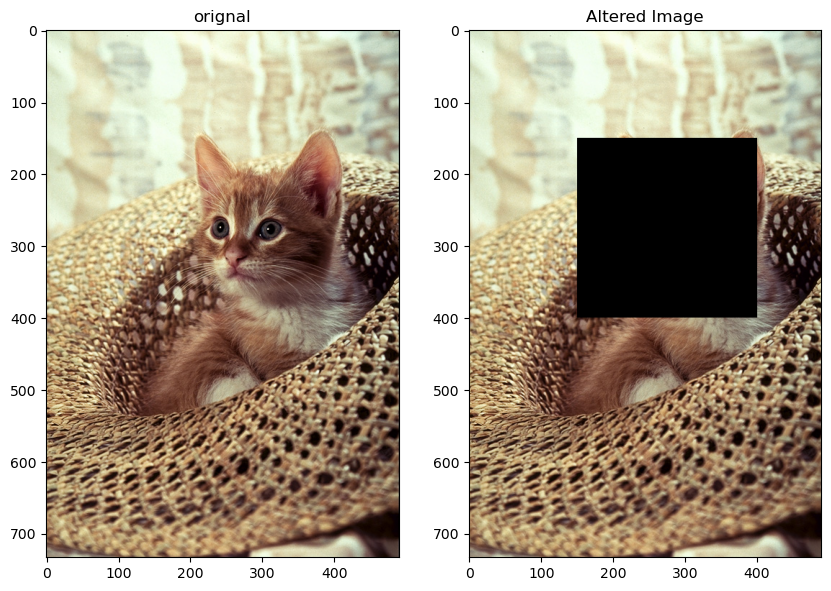

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(array_sq,cv2.COLOR_BGR2RGB))
plt.title("Altered Image")
plt.show()

  We can also create shapes and <code>OpenCV</code>, we can use the method <code>rectangle</code>. The parameter  <code>pt1</code> is the top-left coordinate of the rectangle: <code>(left,top)</code> or $(x_0,y_0)$, <code>pt2</code> is the bottom right coordinate<code>(right,lower)</code> or $(x_1,y_1)$. The parameter <code>color</code>  is a tuple representing the intensity of each channel <code>( blue, green, red)</code>. Finally, we have the line thickness.


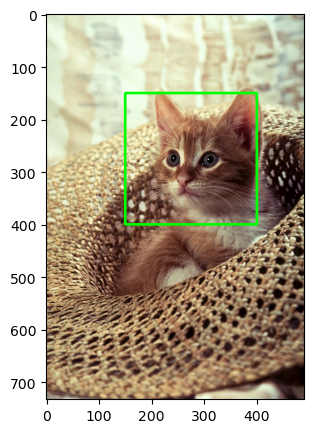

In [30]:
start_point, end_point = (left, upper),(right, lower)
image_draw = np.copy(image)
cv2.rectangle(image_draw, pt1=start_point, pt2=end_point, color=(0, 255, 0), thickness=3) 
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.show()

 <li><code>img</code>: Image array </li>
<li><code>text</code>: Text string to be overlayed</li>
<li><code>org</code>: Bottom-left corner of the text string in the image</li>
<li><code>fontFace</code>: tye type of font </li>
<li><code>fontScale</code>: Font scale</li>
<li><code>color</code>: Text color</li>
<li><code>thickness</code>: Thickness of the lines used to draw a text</li>
<li><code>lineType:</code> Line type</li>

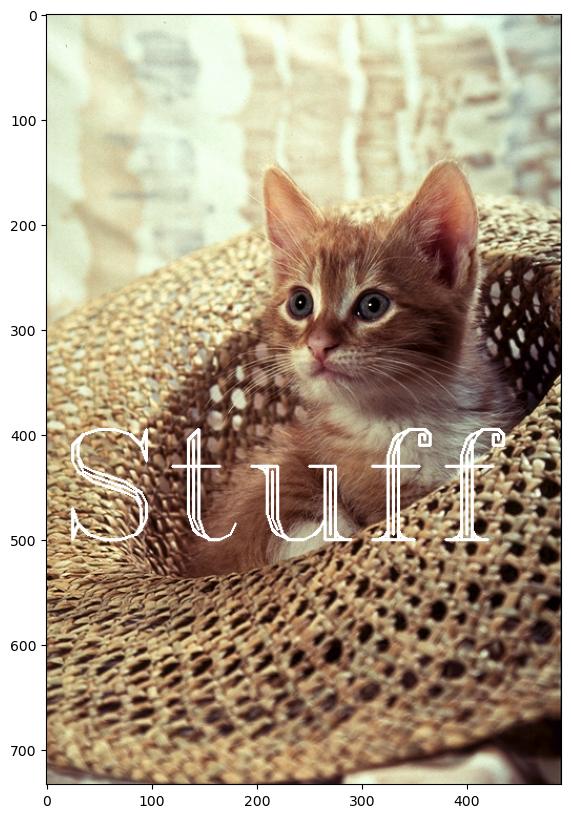

In [32]:
image_draw=cv2.putText(img=image,text='Stuff',org=(10,500),color=(255,255,255),fontFace=4,fontScale=5,thickness=2)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image_draw,cv2.COLOR_BGR2RGB))
plt.show()